In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as stats
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

import datetime as dt
from datetime import timezone, timedelta

In [2]:
timezone_offset = -5.0  # Eastern Standard Time (UTC−08:00)
tzinfo = timezone(timedelta(hours=timezone_offset))
current_dateTime = datetime.now(tzinfo)

In [3]:
begin_date = '2024-08-12T00:00:00.000-05:00'
#end_date = '2024-08-14T11:00:00.000-05:00'
end_date = current_dateTime.strftime('%Y-%m-%dT%H:%M:%S.%f%z')


In [4]:
print(end_date)

2024-10-21T10:26:34.897425-0500


In [5]:
print(current_dateTime.strftime('%Y-%m-%dT%H:%M:%S.%f%z'))

2024-10-21T10:26:34.897425-0500


In [6]:
#print(end_date)

In [7]:
#Read in raw stream guage data
#pompton_plains = pd.read_csv('data/archive/pompton_plains.txt', sep='\t', skiprows=27)
pompton_plains = pd.read_csv('https://nwis.waterservices.usgs.gov/nwis/iv/?sites=01388500&parameterCd=00065&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=26)

print (pompton_plains)

pompton_plains = pompton_plains.iloc[1: , :]
pompton_plains['194446_00065'] = pompton_plains['194446_00065'].astype(float)
pompton_plains = pompton_plains[['datetime','194446_00065']]
pompton_plains = pompton_plains.set_index('datetime')
pompton_plains['item_id'] = 'pompton_gage'
pompton_plains.rename(columns={'194446_00065': 'series'}, inplace=True)
pompton_plains.head()

     agency_cd   site_no          datetime tz_cd 194446_00065 194446_00065_cd
0           5s       15s               20d    6s          14n             10s
1         USGS  01388500  2024-08-12 01:00   EDT         9.47               P
2         USGS  01388500  2024-08-12 01:15   EDT         9.47               P
3         USGS  01388500  2024-08-12 01:30   EDT         9.46               P
4         USGS  01388500  2024-08-12 01:45   EDT         9.46               P
...        ...       ...               ...   ...          ...             ...
6758      USGS  01388500  2024-10-21 10:15   EDT         7.86               P
6759      USGS  01388500  2024-10-21 10:30   EDT         7.86               P
6760      USGS  01388500  2024-10-21 10:45   EDT         7.86               P
6761      USGS  01388500  2024-10-21 11:00   EDT         7.86               P
6762      USGS  01388500  2024-10-21 11:15   EDT         7.86               P

[6763 rows x 6 columns]


,series,item_id
datetime,,
2024-08-12 01:00,9.47,pompton_gage
2024-08-12 01:15,9.47,pompton_gage
2024-08-12 01:30,9.46,pompton_gage
2024-08-12 01:45,9.46,pompton_gage
2024-08-12 02:00,9.45,pompton_gage


In [8]:
#pequannock_riverdale = pd.read_csv('data/archive/pequannock_riverdale.txt', sep='\t', skiprows=26)
pequannock_riverdale = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=01382800&parameterCd=00065&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=26)
pequannock_riverdale = pequannock_riverdale.iloc[1: , :]
pequannock_riverdale['194387_00065'] = pequannock_riverdale['194387_00065'].astype(float)
pequannock_riverdale = pequannock_riverdale[['datetime','194387_00065']]
pequannock_riverdale = pequannock_riverdale.set_index('datetime')
pequannock_riverdale['item_id'] = 'riverdale_gage'
pequannock_riverdale.rename(columns={'194387_00065': 'series'}, inplace=True)
pequannock_riverdale.head()

,series,item_id
datetime,,
2024-08-12 01:00,2.30,riverdale_gage
2024-08-12 01:15,2.30,riverdale_gage
2024-08-12 01:30,2.30,riverdale_gage
2024-08-12 01:45,2.29,riverdale_gage
2024-08-12 02:00,2.29,riverdale_gage


In [9]:
#ramapo_pompton = pd.read_csv('data/archive/ramapo_pompton.txt', sep='\t', skiprows=26)
ramapo_pompton = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=01388000&parameterCd=00065&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=26)
ramapo_pompton = ramapo_pompton.iloc[1: , :]
ramapo_pompton

,agency_cd,site_no,datetime,tz_cd,194435_00065,194435_00065_cd
1,USGS,01388000,2024-08-12 01:00,EDT,8.14,P
2,USGS,01388000,2024-08-12 01:05,EDT,8.14,P
3,USGS,01388000,2024-08-12 01:10,EDT,8.13,P
4,USGS,01388000,2024-08-12 01:15,EDT,8.13,P
5,USGS,01388000,2024-08-12 01:20,EDT,8.13,P
...,...,...,...,...,...,...
20251,USGS,01388000,2024-10-21 10:55,EDT,6.56,P
20252,USGS,01388000,2024-10-21 11:00,EDT,6.56,P
20253,USGS,01388000,2024-10-21 11:05,EDT,6.56,P
20254,USGS,01388000,2024-10-21 11:10,EDT,6.56,P


In [10]:
ramapo_pompton['194435_00065'] = ramapo_pompton['194435_00065'].astype(float)
ramapo_pompton = ramapo_pompton[['datetime','194435_00065']]
ramapo_pompton = ramapo_pompton.set_index('datetime')
ramapo_pompton['item_id'] = 'ramapo_gage'
ramapo_pompton.rename(columns={'194435_00065': 'series'}, inplace=True)
ramapo_pompton.head()

,series,item_id
datetime,,
2024-08-12 01:00,8.14,ramapo_gage
2024-08-12 01:05,8.14,ramapo_gage
2024-08-12 01:10,8.13,ramapo_gage
2024-08-12 01:15,8.13,ramapo_gage
2024-08-12 01:20,8.13,ramapo_gage


In [11]:
#ppp = pd.read_csv('data/archive/pompton_plains_precip.txt',sep='\t', skiprows=26)
ppp = pd.read_csv('https://nwis.waterservices.usgs.gov/nwis/iv/?sites=405811074165501&parameterCd=00045&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb',sep='\t', skiprows=26)
ppp = ppp.iloc[1: , :]
ppp['99543_00045'] = ppp['99543_00045'].astype(float)
ppp = ppp.rename(columns={"99543_00045": "pompton_precip"})
ppp = ppp[['datetime','pompton_precip']]
ppp = ppp.set_index('datetime')
ppp['item_id'] = 'pompton_precip'
ppp.rename(columns={'pompton_precip': 'series'}, inplace=True)
ppp.head()

,series,item_id
datetime,,
2024-08-12 01:00,0.0,pompton_precip
2024-08-12 01:15,0.0,pompton_precip
2024-08-12 01:30,0.0,pompton_precip
2024-08-12 01:45,0.0,pompton_precip
2024-08-12 02:00,0.0,pompton_precip


In [12]:
#rpp = pd.read_csv('data/archive/ramapo_pompton_precip.txt',sep='\t', skiprows=26)
rpp = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=410239074173501&parameterCd=00045&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb',sep='\t', skiprows=26)
rpp = rpp.iloc[1: , :]
rpp['99565_00045'] = rpp['99565_00045'].astype(float)
rpp = rpp.rename(columns={"99565_00045": "ramapo_precip"})
rpp = rpp[['datetime','ramapo_precip']]
rpp = rpp.set_index('datetime')
rpp['item_id'] = 'ramapo_precip'
rpp.rename(columns={'ramapo_precip': 'series'}, inplace=True)
rpp.head()

,series,item_id
datetime,,
2024-08-12 01:00,0.0,ramapo_precip
2024-08-12 01:15,0.0,ramapo_precip
2024-08-12 01:30,0.0,ramapo_precip
2024-08-12 01:45,0.0,ramapo_precip
2024-08-12 02:00,0.0,ramapo_precip


In [13]:
merge = pd.concat([pompton_plains, pequannock_riverdale, ramapo_pompton, ppp, rpp])

merge

In [14]:
merge

,series,item_id
datetime,,
2024-08-12 01:00,9.47,pompton_gage
2024-08-12 01:15,9.47,pompton_gage
2024-08-12 01:30,9.46,pompton_gage
2024-08-12 01:45,9.46,pompton_gage
2024-08-12 02:00,9.45,pompton_gage
...,...,...
2024-10-21 10:00,0.00,ramapo_precip
2024-10-21 10:15,0.00,ramapo_precip
2024-10-21 10:30,0.00,ramapo_precip


In [15]:
merge.reset_index(inplace=True)

merge

,datetime,series,item_id
0,2024-08-12 01:00,9.47,pompton_gage
1,2024-08-12 01:15,9.47,pompton_gage
2,2024-08-12 01:30,9.46,pompton_gage
3,2024-08-12 01:45,9.46,pompton_gage
4,2024-08-12 02:00,9.45,pompton_gage
...,...,...,...
47265,2024-10-21 10:00,0.00,ramapo_precip
47266,2024-10-21 10:15,0.00,ramapo_precip
47267,2024-10-21 10:30,0.00,ramapo_precip
47268,2024-10-21 10:45,0.00,ramapo_precip


In [16]:
test_data = TimeSeriesDataFrame.from_data_frame(merge, id_column="item_id", timestamp_column='datetime') #, timestamp_column=merge.index
test_data = test_data.convert_frequency(freq='H', agg_numeric="max")
test_data.head()

/Users/tott/opt/anaconda3/envs/py310/lib/python3.10/site-packages/autogluon/timeseries/dataset/ts_dataframe.py:942: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset = pd.tseries.frequencies.to_offset(freq)


series
item_id      timestamp                  
pompton_gage 2024-08-12 01:00:00    9.47
             2024-08-12 02:00:00    9.45
             2024-08-12 03:00:00    9.43
             2024-08-12 04:00:00    9.41
             2024-08-12 05:00:00    9.39

In [19]:
predictor = TimeSeriesPredictor.load('pompton_gage_autogluon', require_version_match=False)

In [20]:
predictions = predictor.predict(test_data)

In [21]:
predictions

mean       0.1       0.2       0.3  \
item_id        timestamp                                                     
pompton_gage   2024-10-21 12:00:00  7.859674  7.824487  7.834909  7.842588   
               2024-10-21 13:00:00  7.859351  7.806388  7.822945  7.835207   
               2024-10-21 14:00:00  7.859028  7.788335  7.810170  7.823526   
               2024-10-21 15:00:00  7.858706  7.785989  7.800194  7.820512   
               2024-10-21 16:00:00  7.858383  7.776517  7.797066  7.817766   
               2024-10-21 17:00:00  7.858060  7.767052  7.791707  7.815743   
riverdale_gage 2024-10-21 11:00:00  1.929890  1.830268  1.859775  1.881516   
               2024-10-21 12:00:00  1.929782  1.779831  1.826710  1.861424   
               2024-10-21 13:00:00  1.929674  1.729526  1.791345  1.829159   
               2024-10-21 14:00:00  1.929566  1.723687  1.763905  1.821429   
               2024-10-21 15:00:00  1.929458  1.697673  1.755853  1.814458   
               2024-10-21 16:00:00  1.929350  1.671681  1.741482  1.809535   
ramapo_gage    2024-10-21 12:00:00  6.559648  6.541383  6.546793  6.550779   
               2024-10-21 13:00:00  6.559298  6.531806  6.540401  6.546765   
               2024-10-21 14:00:00  6.558948  6.522253  6.533587  6.540520   
               2024-10-21 15:00:00  6.558598  6.520854  6.528228  6.538774   
               2024-10-21 16:00:00  6.558248  6.515754  6.526422  6.537167   
               2024-10-21 17:00:00  6.557898  6.510663  6.523459  6.535935   
pompton_precip 2024-10-21 12:00:00 -0.000007 -0.022288 -0.015689 -0.010826   
               2024-10-21 13:00:00 -0.000009 -0.026469 -0.015358 -0.011315   
               2024-10-21 14:00:00 -0.000011 -0.031263 -0.019713 -0.012366   
               2024-10-21 15:00:00 -0.000013 -0.027529 -0.020864 -0.013461   
               2024-10-21 16:00:00 -0.000015 -0.025509 -0.016703 -0.010741   
               2024-10-21 17:00:00 -0.000017 -0.027484 -0.017772 -0.010192   
ramapo_precip  2024-10-21 12:00:00  0.000038 -0.325923 -0.229378 -0.158239   
               2024-10-21 13:00:00  0.000041 -0.360204 -0.240403 -0.155832   
               2024-10-21 14:00:00  0.000045 -0.403712 -0.247702 -0.155241   
               2024-10-21 15:00:00  0.000049 -0.379227 -0.251055 -0.175561   
               2024-10-21 16:00:00  0.000053 -0.299106 -0.205861 -0.121712   
               2024-10-21 17:00:00  0.000056 -0.320715 -0.200543 -0.107998   

                                         0.4       0.5       0.6       0.7  \
item_id        timestamp                                                     
pompton_gage   2024-10-21 12:00:00  7.852936  7.861228  7.870129  7.878054   
               2024-10-21 13:00:00  7.846486  7.856753  7.865680  7.878271   
               2024-10-21 14:00:00  7.840980  7.853410  7.869427  7.882966   
               2024-10-21 15:00:00  7.831950  7.842967  7.861429  7.881588   
               2024-10-21 16:00:00  7.833258  7.848327  7.865961  7.886779   
               2024-10-21 17:00:00  7.834827  7.859054  7.874210  7.891561   
riverdale_gage 2024-10-21 11:00:00  1.910813  1.934290  1.959490  1.981928   
               2024-10-21 12:00:00  1.893359  1.922427  1.947702  1.983349   
               2024-10-21 13:00:00  1.878575  1.913769  1.959114  1.997444   
               2024-10-21 14:00:00  1.853813  1.885004  1.937276  1.994349   
               2024-10-21 15:00:00  1.858319  1.900984  1.950910  2.009851   
               2024-10-21 16:00:00  1.863567  1.932162  1.975070  2.024195   
ramapo_gage    2024-10-21 12:00:00  6.556150  6.560454  6.565075  6.569188   
               2024-10-21 13:00:00  6.552620  6.557950  6.562584  6.569119   
               2024-10-21 14:00:00  6.549580  6.556033  6.564347  6.571374   
               2024-10-21 15:00:00  6.544712  6.550430  6.560013  6.570477   
               2024-10-21 16:00:00  6.545209  6.553030  6.562184  6.572990   
               2024-10-21 17:00:00  6.545842  6.558418  6.566

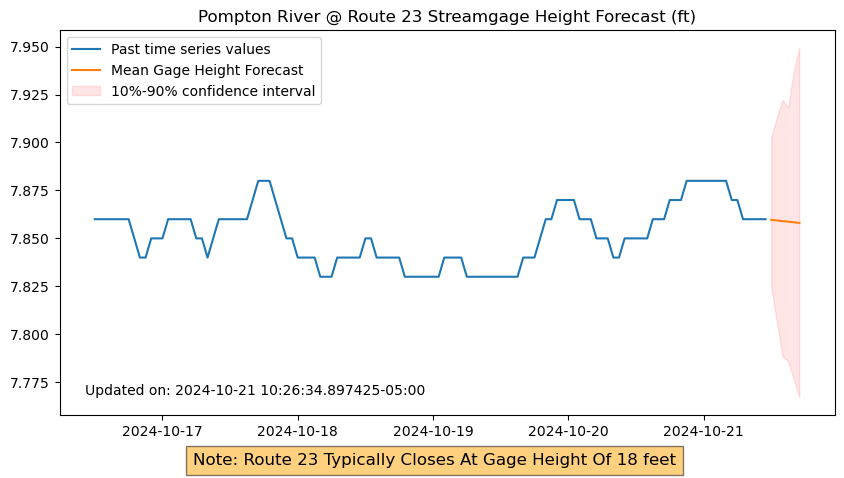

In [25]:
item_id = 'pompton_gage'

plt.figure(figsize=(10, 5))
plt.title('Pompton River @ Route 23 Streamgage Height Forecast (ft)')


y_past = test_data.loc[item_id]
y_pred = predictions.loc[item_id]

plt.plot(y_past[-120:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean Gage Height Forecast")
#plt.plot(y_test, label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.figtext(0.5, 0.01, "Note: Route 23 Typically Closes At Gage Height Of 18 feet", ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.15, 0.15, 'Updated on: '+str(current_dateTime), ha='left', fontsize=10)
plt.legend(loc = 'upper left');
plt.savefig('pompton-gage-forecast.png')

In [ ]:
print(current_dateTime)